<a href="https://colab.research.google.com/github/yash16jr/Deep_Learning/blob/main/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


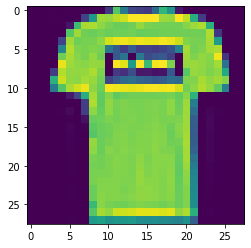

In [3]:
plt.imshow(X_train[1])

In [4]:
## 

**Preprocessing the data**

In [5]:
X_train = X_train/255
X_test = X_test/255

**Reshaping**


In [6]:
X_train= X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28,28,1))

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [9]:
model = Sequential()

model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1, padding = 'same' , activation=keras.layers.LeakyReLU(alpha=0.01), input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(64, (3, 3),strides = 1, padding = 'same', activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3, 3),strides = 1, padding = 'same', activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Conv2D(128, (3, 3),strides = 1, padding = 'same', activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())

model.add(Dense(400,activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.5))

model.add(Dense(400,activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.4))

model.add(Dense(400, activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.3))


model.add(Dense(400, activation=keras.layers.LeakyReLU(alpha=0.01)))
model.add(Dropout(0.2))

model.add(Dense(10, activation= 'softmax'))



In [10]:
model.compile(loss= 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [11]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=15,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0)

In [12]:
model_history = model.fit(X_train, y_train, epochs = 1000, batch_size = 32, validation_split = 0.33, callbacks = early_stopping)

Epoch 1/1000
1257/1257 [==============================] - 21s 8ms/step - loss: 0.6628 - accuracy: 0.7456 - val_loss: 0.3709 - val_accuracy: 0.8669
Epoch 2/1000
1257/1257 [==============================] - 11s 9ms/step - loss: 0.3646 - accuracy: 0.8719 - val_loss: 0.3270 - val_accuracy: 0.8829
Epoch 3/1000
1257/1257 [==============================] - 10s 8ms/step - loss: 0.3188 - accuracy: 0.8878 - val_loss: 0.2992 - val_accuracy: 0.8968
Epoch 4/1000
1257/1257 [==============================] - 11s 9ms/step - loss: 0.2830 - accuracy: 0.9007 - val_loss: 0.2916 - val_accuracy: 0.8974
Epoch 5/1000
1257/1257 [==============================] - 10s 8ms/step - loss: 0.2579 - accuracy: 0.9103 - val_loss: 0.3092 - val_accuracy: 0.9056
Epoch 6/1000
1257/1257 [==============================] - 10s 8ms/step - loss: 0.2490 - accuracy: 0.9151 - val_loss: 0.3143 - val_accuracy: 0.8870
Epoch 7/1000
1257/1257 [==============================] - 10s 8ms/step - loss: 0.2257 - accuracy: 0.9227 - val_loss: 0

In [13]:
ev = model.evaluate(X_test,y_test)
ev


313/313 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.9046


[0.2823098301887512, 0.9046000242233276]

In [14]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 2ms/step


In [15]:
accuracy = np.sum(y_pred_labels == y_test) / len(y_test) * 100

In [16]:
accuracy

90.46